# **Linear Regression: Boston House Price Prediction**

Welcome to the Case study on **Linear Regression**. We will use the Boston house price data for the exercise to build a regression model.

--------------

## **Problem Statement**
---------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

----------------------------
## **Data Information**
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below -

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centres
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     median value of owner-occupied homes in 1000 dollars.


## **Importing the necessary libraries**

In [42]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
from google.colab import drive
# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Practice")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Read the dataset**

In [43]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations:**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

#### **Get information about the dataset using the info() method**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

## **Exploratory Data Analysis**

#### **Let's now check the summary statistics of this dataset**

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
* The **50th percentile of ZN** (proportion of residential land zoned for lots over 25,000 sq.ft.) **is 0**. This indicates that at least half the residential plots are under 25,000 sq. ft in area.

* The **75th percentile of CHAS** (Charles River dummy variable) **is 0**. It indicates that the vast majority of these houses are away from the Charles River.

* The **mean house price** is approx. **USD 22,500**, whereas **the median of the house prices** is approx. **USD 21,200**. This indicates that the price distribution is only slightly skewed towards the right side.



Before performing the modeling, it is important to check the univariate distribution of the variables.

## **Univariate Analysis**

### **Check the distribution of the variables**

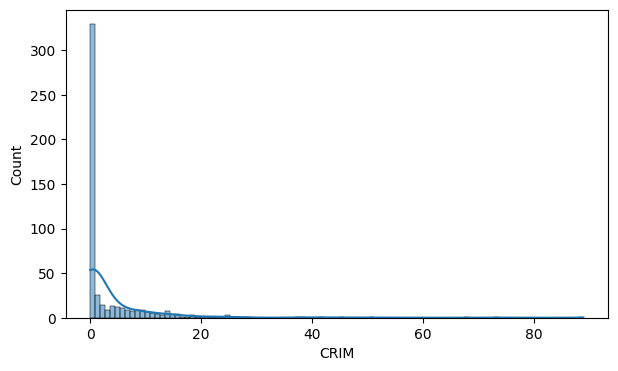

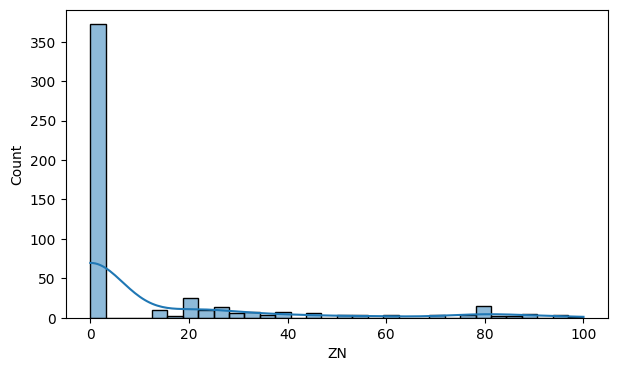

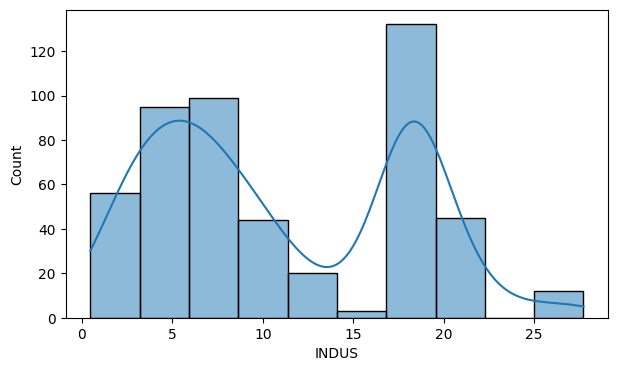

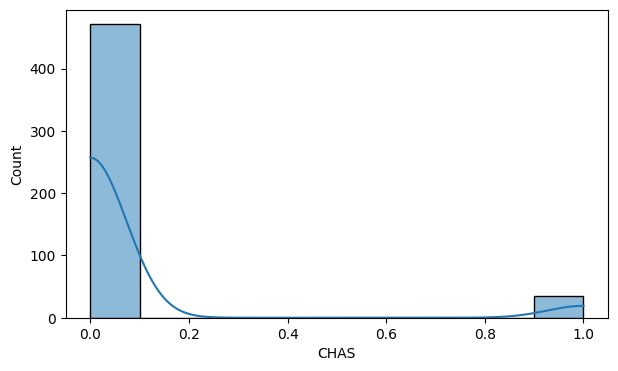

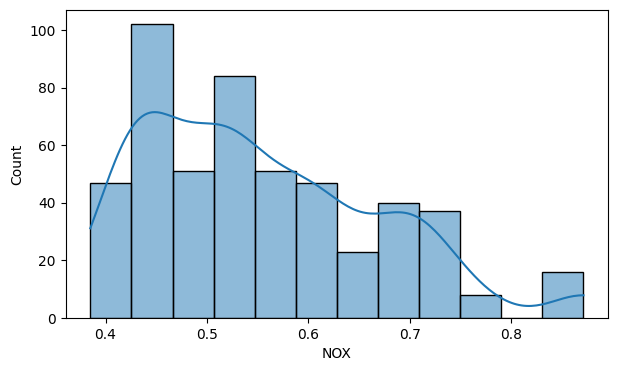

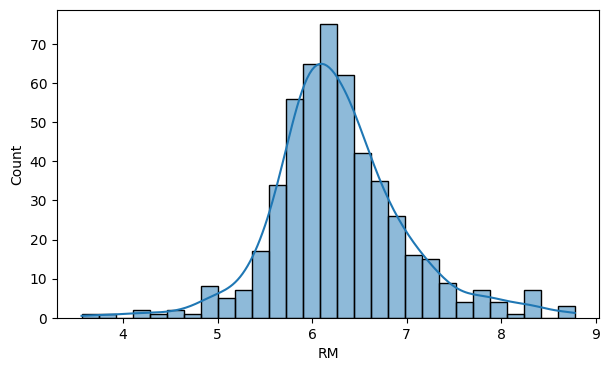

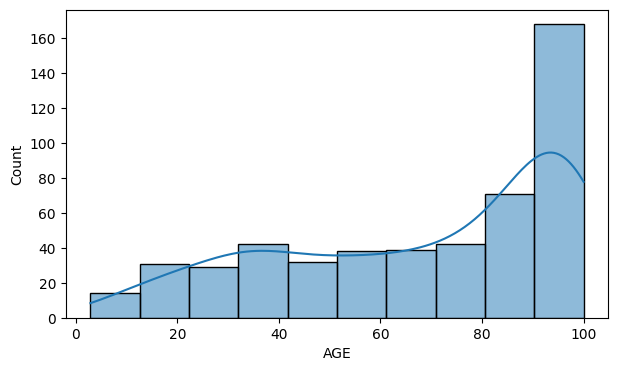

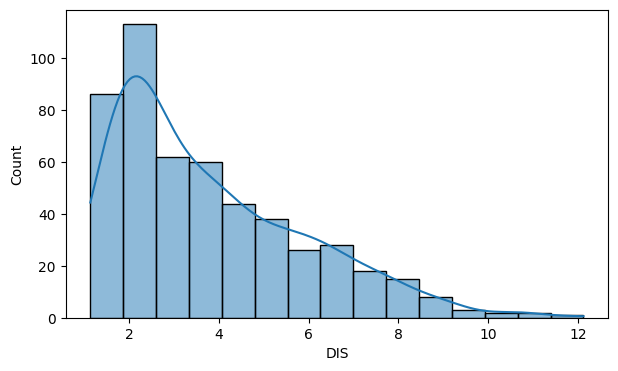

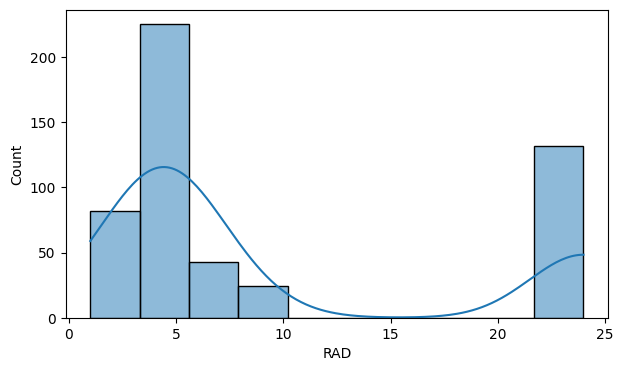

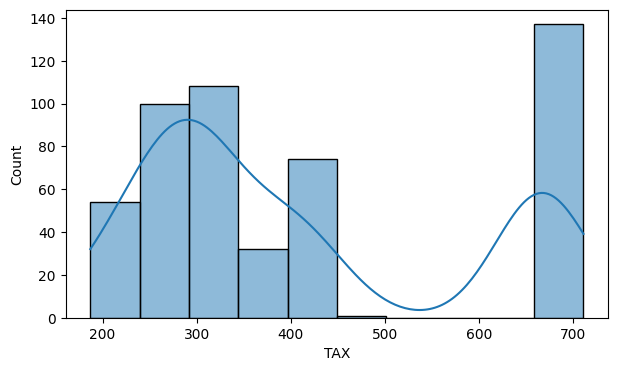

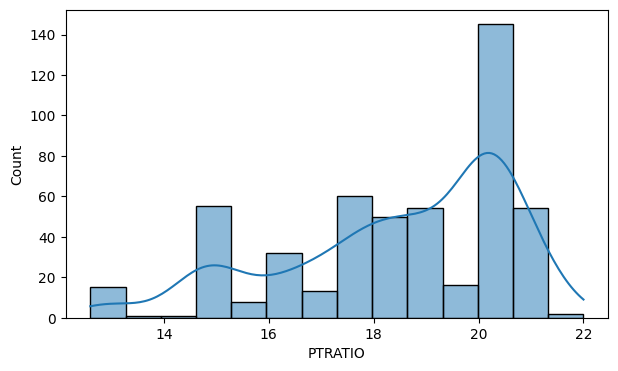

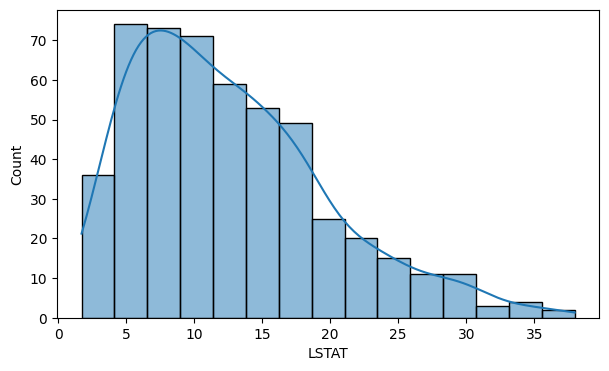

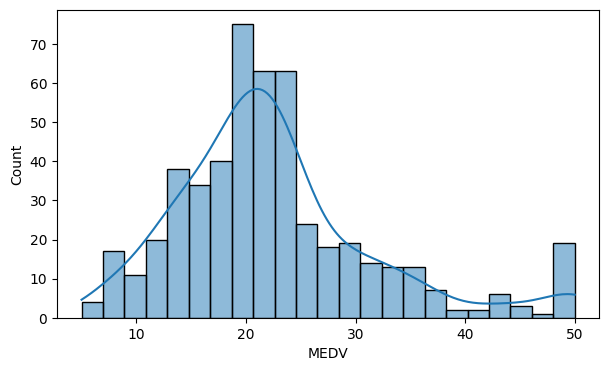

In [46]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

**Observations:**

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from the Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right-skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [47]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

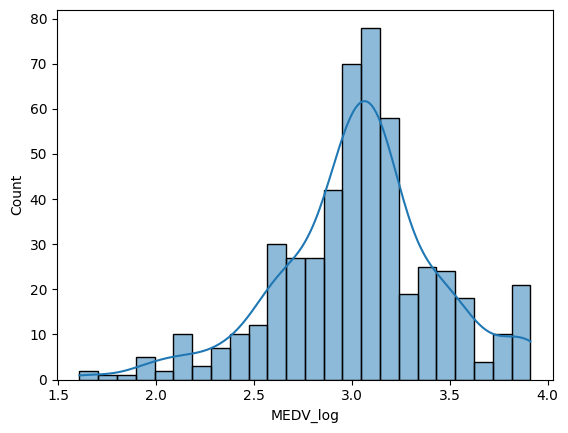

In [48]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have an **approx. normal distribution and with less skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

## **Bivariate Analysis**

### **Let's check the correlation using the heatmap**

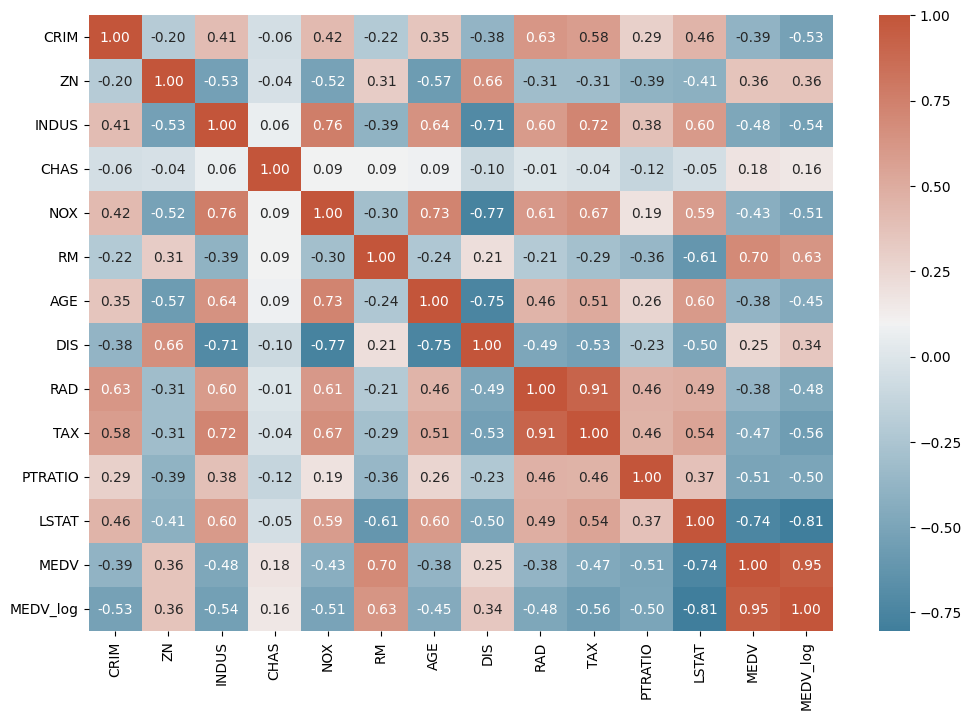

In [49]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap )
plt.show()

**Observations:**

* **Significant correlations** are present between **NOX and INDUS** (0.76) - because areas with a higher proportion of non-retail industries are likely to contribute to Nitric Oxide air pollution.
* The variable **DIS has a strong negative correlation with INDUS (-0.71), NOX (-0.77), and AGE (-0.75)**, which are all significantly positively correlated with each other as well. An explanation for this could be that areas closer to the center of the Boston city/metropolitan area, contain the oldest buildings and factories of importance, and their distance from the five employment centers in the heart of the city is also consequently small.
* Features **RAD and TAX are very strongly correlated (0.91)**.
* **INDUS and TAX** are also significantly correlated (0.72).
* **RM shows a significant positive correlation with MEDV**, likely since the higher the number of rooms per dwelling the more expensive the house is, while **LSTAT shows a strong negative linear relationship with MEDV**, showing the likelihood of houses in areas with a higher percentage of the lower-status population (poor education, laborers and unskilled employment) to be less expensive.


## **Model Building - Approach**

1. Data preparation
2. Partition the data into train and test set
3. Build model on the train data
4. Cross-validating the model
5. Test the data on test set

### **Split the dataset**
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [50]:
# Separate the dependent and indepedent variable
Y = df['MEDV']
X = df.drop(columns = {'MEDV', 'MEDV_log'})



In [51]:
# Splitting the data in 70:30 ratio of train to test data
x_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20 , random_state = 1)

In [52]:
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(x_train)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = x_train.index, columns = x_train.columns)

train_features_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
42,0.001519,0.00,0.236437,0.0,0.129630,0.499713,0.038105,0.417509,0.086957,0.087786,0.563830,0.112583
58,0.001665,0.25,0.171188,0.0,0.139918,0.495114,0.270855,0.607917,0.304348,0.185115,0.755319,0.141556
385,0.188890,0.00,0.646628,0.0,0.648148,0.328799,0.980433,0.026962,1.000000,0.914122,0.808511,0.802428
78,0.000564,0.00,0.453446,0.0,0.106996,0.511784,0.523172,0.353236,0.173913,0.402672,0.648936,0.292770
424,0.098750,0.00,0.646628,0.0,0.409465,0.383982,0.697219,0.084924,1.000000,0.914122,0.808511,0.425773


In [53]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train) # training

LinearRegression()

In [54]:
#Let's see the summary of our linear model
print(lr_model.coef_)

[-1.19748967e-01  5.82314507e-02  1.20492151e-02  2.24170813e+00
 -2.03496288e+01  3.00100205e+00  6.31513116e-03 -1.51572323e+00
  2.87525576e-01 -1.12954313e-02 -9.72468413e-01 -5.64923122e-01]


In [55]:
# this is for our understanding - not needed for LR model
import numpy as np
importance = np.array(lr_model.coef_)
importance = importance / sum(importance)
print(importance )

[ 6.67982696e-03 -3.24826196e-03 -6.72128321e-04 -1.25046777e-01
  1.13514131e+00 -1.67401648e-01 -3.52270123e-04  8.45499475e-02
 -1.60387279e-02  6.30080812e-04  5.42461524e-02  3.15124948e-02]


In [56]:
for z in range(len(list(x_train.columns))):
    print("The Importance coefficient for {} is {}".format(x_train.columns[z], importance[z]))

The Importance coefficient for CRIM is 0.006679826959208922
The Importance coefficient for ZN is -0.00324826196033203
The Importance coefficient for INDUS is -0.0006721283212566887
The Importance coefficient for CHAS is -0.1250467769506411
The Importance coefficient for NOX is 1.1351413106515995
The Importance coefficient for RM is -0.1674016479262093
The Importance coefficient for AGE is -0.000352270123445408
The Importance coefficient for DIS is 0.0845499474956251
The Importance coefficient for RAD is -0.016038727865394235
The Importance coefficient for TAX is 0.0006300808115258481
The Importance coefficient for PTRATIO is 0.054246152433470855
The Importance coefficient for LSTAT is 0.03151249479584888


In [57]:
print(lr_model.intercept_)

46.77615924293313


In [58]:
y_train_pred = lr_model.predict(x_train)
residuals = (y_train_pred - y_train)

Text(0.5, 0, 'Errors')

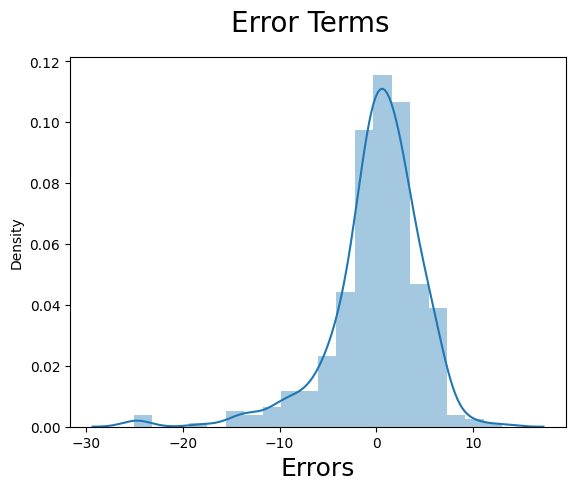

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

In [60]:
# Making predictions
y_test_pred = lr_model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
r2_score(y_test, y_test_pred)

0.7514046235740618

In [62]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.19640947410709877

Text(0, 0.5, 'y_test_pred')

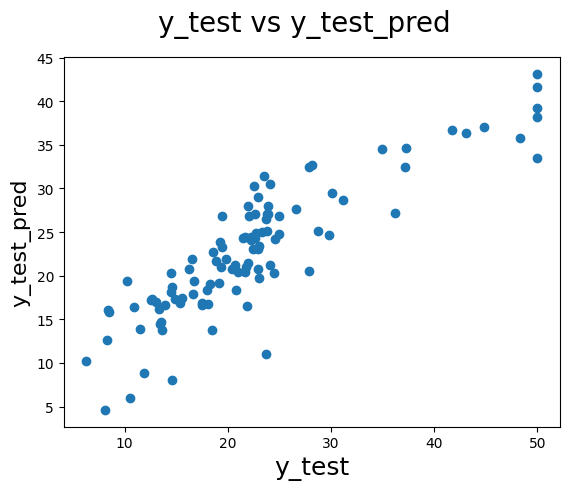

In [63]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [64]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
# Dictionary to store results
results = {}

# Function to evaluate and store model results
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}
    print(f"\n{name} Results:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    return model

# 1. Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Ridge Regression", ridge, x_train, y_train, X_test, y_test)

# 2. Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Lasso Regression", lasso, x_train, y_train, X_test, y_test)

# 3. Decision Tree
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Decision Tree", dt, x_train, y_train, X_test, y_test)

# 4. Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Random Forest", rf, x_train, y_train, X_test, y_test)

# 5. Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Gradient Boosting", gb, x_train, y_train, X_test, y_test)

# 6. XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7]
}
xgb = GridSearchCV(XGBRegressor(random_state=42, objective='reg:squarederror'), xgb_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("XGBoost", xgb, x_train, y_train, X_test, y_test)

# Display all results
print("\n--- Model Comparison Summary ---")
for model_name, metrics in results.items():
    print(f"{model_name}: R2={metrics['R2']:.4f}, RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}")


Ridge Regression Results:
R2 Score: 0.7521
RMSE: 4.9499
MAE: 3.8611

Lasso Regression Results:
R2 Score: 0.7515
RMSE: 4.9560
MAE: 3.8677

Decision Tree Results:
R2 Score: 0.8586
RMSE: 3.7378
MAE: 2.9116

Random Forest Results:
R2 Score: 0.9022
RMSE: 3.1087
MAE: 2.4418

Gradient Boosting Results:
R2 Score: 0.9061
RMSE: 3.0462
MAE: 2.2835

XGBoost Results:
R2 Score: 0.8787
RMSE: 3.4624
MAE: 2.4937

--- Model Comparison Summary ---
Ridge Regression: R2=0.7521, RMSE=4.95, MAE=3.86
Lasso Regression: R2=0.7515, RMSE=4.96, MAE=3.87
Decision Tree: R2=0.8586, RMSE=3.74, MAE=2.91
Random Forest: R2=0.9022, RMSE=3.11, MAE=2.44
Gradient Boosting: R2=0.9061, RMSE=3.05, MAE=2.28
XGBoost: R2=0.8787, RMSE=3.46, MAE=2.49


In [66]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
y_pred = random_search.predict(X_test)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", random_search.best_params_)
print("R² Score:", r2)
print("RMSE:", rmse)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
R² Score: 0.9274133756408557
RMSE: 2.67834773611151


In [67]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

lgb = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42
)

lgb.fit(x_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LGBM R2 Score:", r2_score(y_test, y_pred_lgb))
print("LGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 12
[LightGBM] [Info] Start training from score 22.522277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [68]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(**random_search.best_params_, random_state=42))
]

stack_model = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack_model.fit(x_train, y_train)
y_pred_stack = stack_model.predict(X_test)

print("Stacked Model R2 Score:", r2_score(y_test, y_pred_stack))
print("Stacked Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))

Stacked Model R2 Score: 0.931657745344865
Stacked Model RMSE: 2.598862562306743


AttributeError: module 'matplotlib.pyplot' has no attribute 'legen'

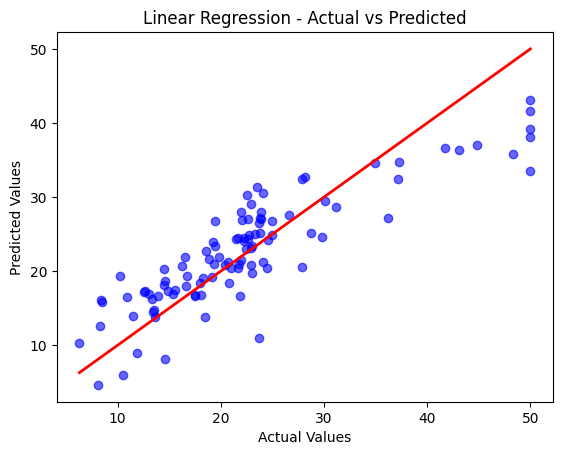

In [73]:
# Predictions
#y_pred = lr_model.predict(X_test)
# --- Plotting --- plt.figure(figsize=(8,6))
# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
# Add best-fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs Predicted")
plt.legen

Text(0, 0.5, 'y_test_pred')

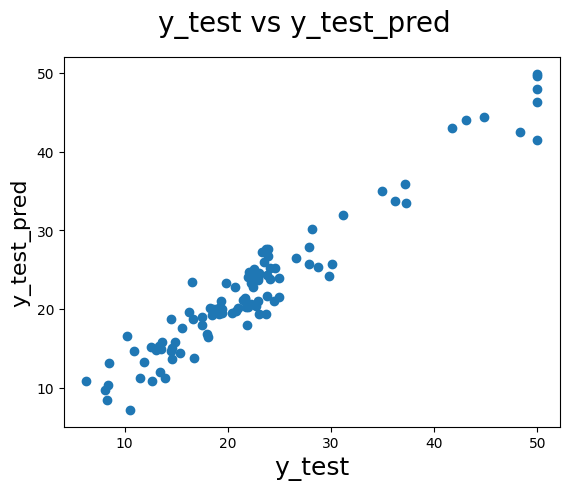

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_stack)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [70]:
from sklearn.neural_network import MLPRegressor

# 8. Neural Network
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}
mlp = GridSearchCV(MLPRegressor(random_state=42), mlp_params, cv=5, scoring='r2', n_jobs=-1)
evaluate_model("Neural Network (MLP)", mlp, x_train, y_train, X_test, y_test)


Neural Network (MLP) Results:
R2 Score: 0.5211
RMSE: 6.8794
MAE: 4.9838


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [500]},
             scoring='r2')

Text(0, 0.5, 'y_test_pred')

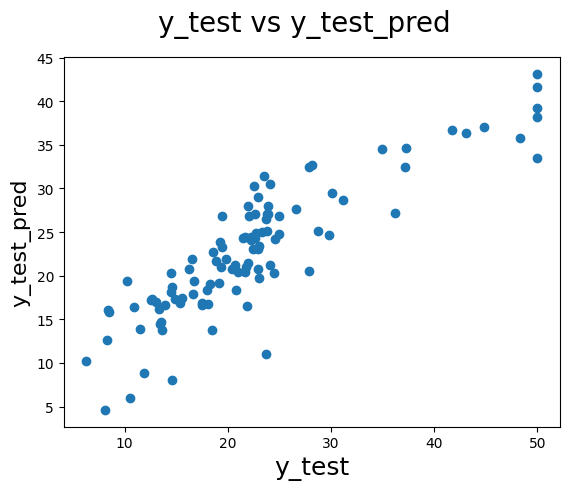

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label